In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


In [2]:
import os
os.chdir('C:\\code\\activ')

In [3]:
df_name = 'nov_nine_var.xlsx'

In [4]:
input_layer = tf.keras.layers.Input(shape=(21,))

encoded = tf.keras.layers.Dense(128, activation='relu')(input_layer)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(3)(encoded)
 
decoded = tf.keras.layers.Dense(3, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(32, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(21)(decoded)
 
# autoencoder
autoencoder = tf.keras.Model(input_layer, decoded)
 
# encoder
encoder = tf.keras.Model(input_layer, encoded)
decoder = tf.keras.Model(encoded, decoded)

encoder.compile(loss='mse')
decoder.compile(loss='mse')
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [5]:
df = pd.read_excel("./documents/"+df_name)
X = df.iloc[:,1:22]
y = df.iloc[:,22::].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

X_train = X_train.astype(np.float16)
X_test = X_test.astype(np.float16)

hist = autoencoder.fit(X_train, X_train, batch_size=8, epochs=1000, validation_data=(X_test,X_test), verbose=1,)

out = encoder.predict(X)
enc_out = pd.DataFrame(out)
enc_out.to_excel('./documents/latent_vector/real_enc.xlsx')

Epoch 1/1000
43/43 [==============================] - 1s 7ms/step - loss: 0.1973 - mae: 0.3588 - val_loss: 0.1047 - val_mae: 0.2525
Epoch 2/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.0677 - mae: 0.2113 - val_loss: 0.0693 - val_mae: 0.2187
Epoch 3/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.0581 - mae: 0.1948 - val_loss: 0.0698 - val_mae: 0.2183
Epoch 4/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.0579 - mae: 0.1943 - val_loss: 0.0698 - val_mae: 0.2187
Epoch 5/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.0581 - mae: 0.1953 - val_loss: 0.0697 - val_mae: 0.2187
Epoch 6/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.0582 - mae: 0.1957 - val_loss: 0.0690 - val_mae: 0.2186
Epoch 7/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.0579 - mae: 0.1949 - val_loss: 0.0708 - val_mae: 0.2191
Epoch 8/1000
43/43 [==============================] - 0s 2ms/step - loss: 0.

In [6]:
encoder.save('./model/encoder.h5')
decoder.save('./model/decoder.h5')

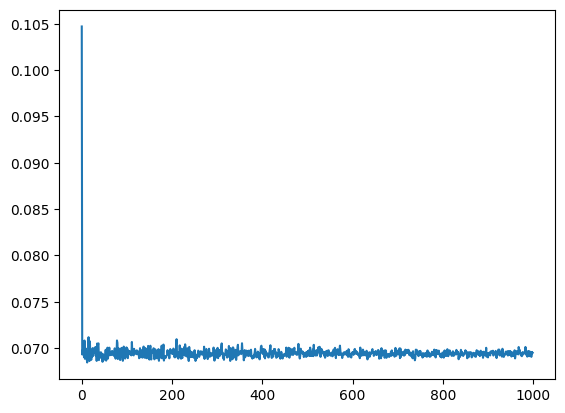

In [7]:
plt.plot(hist.history["val_loss"])
plt.show()

In [8]:
encoder.trainable = False

In [9]:
df = pd.read_excel('./documents/result/basic.xlsx').iloc[:,1:23]
X = scaler.fit_transform(df.iloc[:,0:21])
X = X.astype(np.float16)

out = encoder.predict(X)
enc_out = pd.DataFrame(out)
enc_out.to_excel('./documents/latent_vector/basic_enc.xlsx')

32/32 [==============================] - 0s 1ms/step


In [10]:
df = pd.read_excel('./documents/result/basic_formula.xlsx').iloc[:,1:23]
X = scaler.fit_transform(df.iloc[:,0:21])
X = X.astype(np.float16)

out = encoder.predict(X)
enc_out = pd.DataFrame(out)
enc_out.to_excel('./documents/latent_vector/basic_formula_enc.xlsx')

32/32 [==============================] - 0s 1ms/step


In [11]:
df = pd.read_excel('./documents/result/reinforce.xlsx').iloc[:,1:23]
X = scaler.fit_transform(df.iloc[:,0:21])
X = X.astype(np.float16)

out = encoder.predict(X)
enc_out = pd.DataFrame(out)
enc_out.to_excel('./documents/latent_vector/reinforce_enc.xlsx')

6/6 [==============================] - 0s 1ms/step


In [12]:
df = pd.read_excel('./documents/result/dqn.xlsx').iloc[:,1:23]
X = scaler.fit_transform(df.iloc[:,0:21])
X = X.astype(np.float16)

out = encoder.predict(X)
enc_out = pd.DataFrame(out)
enc_out.to_excel('./documents/latent_vector/dqn_enc.xlsx')

4/4 [==============================] - 0s 2ms/step


In [13]:
df = pd.read_excel("./documents/result/ae_formula.xlsx").iloc[:,1:23]
X = scaler.fit_transform(df.iloc[:,0:21])
X = X.astype(np.float16)

out = encoder.predict(X)
enc_out = pd.DataFrame(out)
enc_out.to_excel('./documents/latent_vector/ae_formula_enc.xlsx')

32/32 [==============================] - 0s 1ms/step


In [14]:
df = pd.read_excel("./documents/result/reinforce_Gan.xlsx").iloc[:,1:23]
X = scaler.fit_transform(df.iloc[:,0:21])
X = X.astype(np.float16)

out = encoder.predict(X)
enc_out = pd.DataFrame(out)
enc_out.to_excel('./documents/latent_vector/reinforce_gan_enc.xlsx')

7/7 [==============================] - 0s 2ms/step
